<a href="https://colab.research.google.com/github/rajeshmore1/PCA-and-K-means-On-20-Newsgroups-dataset/blob/main/Rajesh_More_Copy_of_M3W4_Self_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective : This task requires you to build text clusters and report whether these clusters make sense. </b></u>

* ###  For this clustering project on text, you will use a dataset named 20newsgroup. This is available in sklearn.datasets. You can use the code given below in the code cells to fetch the data.

* ### Next you need to run a TFIDFVectorizer on the sentences to obtain a document-word sparse matrix. Use this array as your $X$.

* ### Once you have got your array, you can apply different clustering techniques such as K-Means clustering and Hierarchical clustering to obtain meaningful clusters. Check if these clusters seem relevant and well separated. 

* ### Finally you can use dimensionality reduction technqiues such as PCA or t-SNE(you can read about it and use it straight away) to come up with two dimensional visualization of these clusters. 







### In your <b>Capstone project</b>, you will perform clustering on documents to find relevant themes/topics. We call this Topic Modeling. There are different algorithms for building a topic model such as Latent Dirichlet Allocation (LDA), NMF etc. For now you are only expected to use the clustering algorithms discussed so far.

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import pandas as pd
import random
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups

In [27]:
dataset = fetch_20newsgroups(download_if_missing=True,remove = ('headers', 'footers', 'quotes'))

In [7]:
print('Training data size:', len(dataset['data']))


Training data size: 11314


In [8]:
len(dataset['target'])


11314

In [9]:
dataset.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [17]:
# Finding frequency of each category
targets, frequency = np.unique(dataset.target, return_counts=True)
targets, frequency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377]))

In [18]:
targets_str = np.array(dataset.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


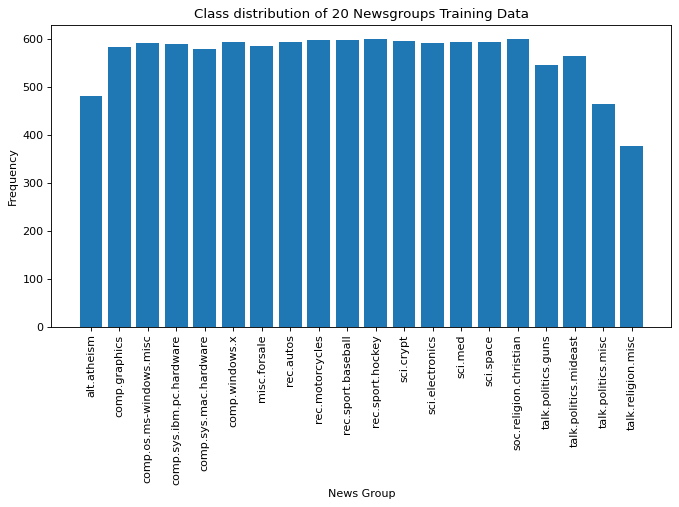

In [19]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

In [29]:
dataset_df = pd.DataFrame({'data': dataset.data, 'target': dataset.target})
dataset_df.head()

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [30]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

dataset_df['data'] = dataset_df.data.map(alphanumeric).map(punc_lower)
dataset_df.head()

,data,target
0,i was wondering if anyone out there could enli...,7
1,a fair number of brave souls who upgraded thei...,4
2,well folks my mac plus finally gave up the gh...,4
3,\ndo you have weitek s address phone number ...,1
4,from article world std com by tombaker ...,14


In [31]:
dataset_df.data

0        i was wondering if anyone out there could enli...
1        a fair number of brave souls who upgraded thei...
2        well folks  my mac plus finally gave up the gh...
3        \ndo you have weitek s address phone number   ...
4        from article      world std com   by tombaker ...
                               ...                        
11309    dn  from  nyeda cnsvax uwec edu  david nye \nd...
11310    i have a  very old  mac   and a mac plus  both...
11311    i just installed a     cpu in a clone motherbo...
11312    \nwouldn t this require a hyper sphere   in   ...
11313    stolen from pasadena between     and     pm on...
Name: data, Length: 11314, dtype: object

# K means Clustering:

In [32]:
texts = dataset.data # Extract text
target = dataset.target # Extract target

In [33]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)


In [34]:
number_of_clusters = 20


model = KMeans(n_clusters=number_of_clusters, 
               init='k-means++', 
               max_iter=100, # Maximum number of iterations of the k-means algorithm for a single run.
               n_init=1)  # Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=20, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [36]:
for i in range(number_of_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])


Cluster 0:
 pregnancy
 education
 teenage
 fascinated
 guess
 abstinence
 contraceptive
 simplistic
 proportion
 decreased
Cluster 1:
 ssetroot
 tvtwm
 sunkbd
 patch
 starts
 install
 keyboard
 virtualdesktopbackground
 virtualdesktopbackgroundpixmap
 pagedown
Cluster 2:
 apple
 4mb
 simms
 account
 design
 service
 fool
 lc
 generally
 close
Cluster 3:
 manadatory
 federal
 analogy
 classes
 insurance
 safety
 carry
 gun
 credentials
 abridge
Cluster 4:
 spiritual
 truth
 christianity
 things
 choice
 discussions
 evidence
 daddy
 religions
 false
Cluster 5:
 cystic
 menopause
 estrogen
 sybase
 pleasures
 lump
 big
 caffeine
 cigarettes
 thrilled
Cluster 6:
 just
 like
 know
 don
 people
 think
 does
 use
 thanks
 good
Cluster 7:
 cg3
 sparcclassic
 1152x900
 expects
 guessing
 1024x768
 x11r5
 resolution
 guess
 version
Cluster 8:
 drivers
 windows
 ultra
 bit
 gateway
 ati
 16
 pro
 bus
 dx2
Cluster 9:
 15amp
 estimation
 mazda
 converting
 electric
 wire
 table
 range
 carry
 frie

In [37]:
print (texts[400])


Isn't Clipper a trademark of Fairchild Semiconductor?


In [38]:
X = vectorizer.transform([texts[400]])

cluster = model.predict(X)[0]

print("Text belongs to cluster number {0}".format(cluster))

Text belongs to cluster number 6


In [39]:
for ind in order_centroids[cluster, :10]:
    print(' %s' % terms[ind])

 just
 like
 know
 don
 people
 think
 does
 use
 thanks
 good


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


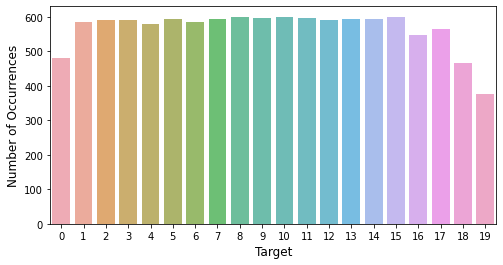

In [43]:
count_target = dataset_df['target'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(count_target.index, count_target.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Target', fontsize=12);

# PCA

In [44]:
dataset_df.head(5)

,data,target
0,i was wondering if anyone out there could enli...,7
1,a fair number of brave souls who upgraded thei...,4
2,well folks my mac plus finally gave up the gh...,4
3,\ndo you have weitek s address phone number ...,1
4,from article world std com by tombaker ...,14


In [46]:
dataset_df = dataset_df.drop_duplicates()
dataset_df = dataset_df.reset_index(drop=True)
dataset_df.describe(include='all')

,data,target
count,11059,11059.000000
unique,10992,NaN
top,,NaN
freq,20,NaN
mean,NaN,9.299123
std,NaN,5.564178
min,NaN,0.000000
25%,NaN,5.000000
50%,NaN,9.000000
75%,NaN,14.000000


In [52]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [58]:
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var


TruncatedSVD(algorithm='randomized', n_components=5, n_iter=7, random_state=42,
             tol=0.0)

# What is t-SNE?

t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008.

In [65]:
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']

In [66]:
twenty_train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)

In [67]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [68]:
len(twenty_train.data)

2257

In [69]:
len(twenty_train.filenames)

2257

In [70]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton


In [71]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [72]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

In [73]:
for t in twenty_train.target[:10]:
...     print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [74]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [75]:
count_vect.vocabulary_.get(u'algorithm')

4690

In [76]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 35788)

In [78]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

# Naive Bayes Classifier

In [79]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [81]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
     print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [83]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])

In [85]:
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [86]:
twenty_test = fetch_20newsgroups(subset='test',
...     categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.8348868175765646

In [90]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)),])

text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.9101198402130493

In [91]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.95      0.80      0.87       319
         comp.graphics       0.87      0.98      0.92       389
               sci.med       0.94      0.89      0.91       396
soc.religion.christian       0.90      0.95      0.93       398

              accuracy                           0.91      1502
             macro avg       0.91      0.91      0.91      1502
          weighted avg       0.91      0.91      0.91      1502



In [92]:
metrics.confusion_matrix(twenty_test.target, predicted)

array([[256,  11,  16,  36],
       [  4, 380,   3,   2],
       [  5,  35, 353,   3],
       [  5,  11,   4, 378]])

In [93]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf__alpha': (1e-2, 1e-3),}

In [94]:
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)

In [95]:
gs_clf = gs_clf.fit(twenty_train.data[:400], twenty_train.target[:400])

In [96]:
twenty_train.target_names[gs_clf.predict(['God is love'])[0]]

'soc.religion.christian'

# K means by setting number of clusters as 50.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


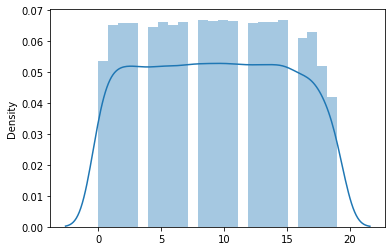

In [99]:
import seaborn as sns
sns.distplot(dataset.target)
import matplotlib.pyplot as plt
plt.show()



In [1]:
 import sklearn.datasets

In [3]:
all_data = sklearn.datasets.fetch_20newsgroups(subset='all')


In [4]:
print(len(all_data.filenames))

18846


In [5]:
 print(all_data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [9]:
 train_data = sklearn.datasets.fetch_20newsgroups(subset='train')

In [10]:
print(len(train_data.filenames))


11314


In [11]:
 test_data = sklearn.datasets.fetch_20newsgroups(subset='test')


In [12]:
print(len(test_data.filenames))

7532


In [13]:
groups = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'comp.windows.x', 'sci.space']

In [14]:
 train_data = sklearn.datasets.fetch_20newsgroups(subset='train',
categories=groups)

In [15]:
 print(len(train_data.filenames))

3529


In [16]:
 test_data = sklearn.datasets.fetch_20newsgroups(subset='test',
categories=groups)

In [17]:
print(len(test_data.filenames))

2349


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer = TfidfVectorizer(min_df=10, max_df=0.5,stop_words='english', decode_error='ignore')

In [22]:
vectorized = vectorizer.fit_transform(train_data.data)

In [23]:
num_samples, num_features = vectorized.shape

In [24]:
 print("#samples: %d, #features: %d" % (num_samples,
num_features))

#samples: 3529, #features: 5651


In [25]:
 num_clusters = 50

In [26]:
 from sklearn.cluster import KMeans

In [27]:
km = KMeans(n_clusters=num_clusters, init='random', n_init=1,
verbose=1, random_state=3)

In [28]:
 km.fit(vectorized)

Initialization complete
Iteration  0, inertia 6000.054
Iteration  1, inertia 3239.814
Iteration  2, inertia 3203.517
Iteration  3, inertia 3184.091
Iteration  4, inertia 3174.934
Iteration  5, inertia 3168.886
Iteration  6, inertia 3162.436
Iteration  7, inertia 3156.292
Iteration  8, inertia 3152.353
Iteration  9, inertia 3149.592
Iteration 10, inertia 3147.039
Iteration 11, inertia 3145.005
Iteration 12, inertia 3144.188
Iteration 13, inertia 3143.711
Iteration 14, inertia 3143.517
Iteration 15, inertia 3143.416
Iteration 16, inertia 3143.313
Iteration 17, inertia 3143.261
Iteration 18, inertia 3143.209
Converged at iteration 18: center shift 0.000000e+00 within tolerance 1.731605e-08


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=50, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=1)

In [29]:
print(km.labels_)


[26 26 25 ... 42  9  8]


In [30]:
print(km.labels_.shape)

(3529,)


In [31]:
 km.cluster_centers_

array([[0.00000000e+00, 2.19805678e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.24019719e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.79776027e-03, 8.11786416e-03, 8.92929632e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82080056e-05, 0.00000000e+00],
       [5.42960959e-04, 0.00000000e+00, 2.38374343e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.56288136e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# PCA on 20 newsgroups data

In [32]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(shuffle=True, random_state=777, remove=('headers', 'footers', 'quotes'))
print('-'*20 + '20 Newsgroups data class' + '-'*20)
print(news.target_names)
print('-'*20 + '20 Newsgroups data sample' + '-'*20)
print(news.data[0])

--------------------20 Newsgroups data class--------------------
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
--------------------20 Newsgroups data sample--------------------


And I recommend the movie _The Thin Blue Line_, which is about the
same case.  Not as much legal detail, but still an excellent film.  It
shows how very easy it is to come up with seemingly conclusive
evidence against someone whom you think is guilty.


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

data_samples = news.data[:1000]
data_target = news.target[:1000]
data_class = news.target_names
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=100, stop_words='english')
TFIDF = tfidf_vectorizer.fit_transform(data_samples)

In [35]:
print(TFIDF.toarray()[0:2])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.61061632 0.         0.
  0.61941575 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.49342866 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(TFIDF.toarray())
print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca.explained_variance_ratio_)
print('-'*20 + 'Singular value' + '-'*20)
print(pca.singular_values_)

--------------------Explained variance ratio--------------------
[0.03153817 0.02615842]
--------------------Singular value--------------------
[5.18520003 4.7222934 ]


(1000, 2)


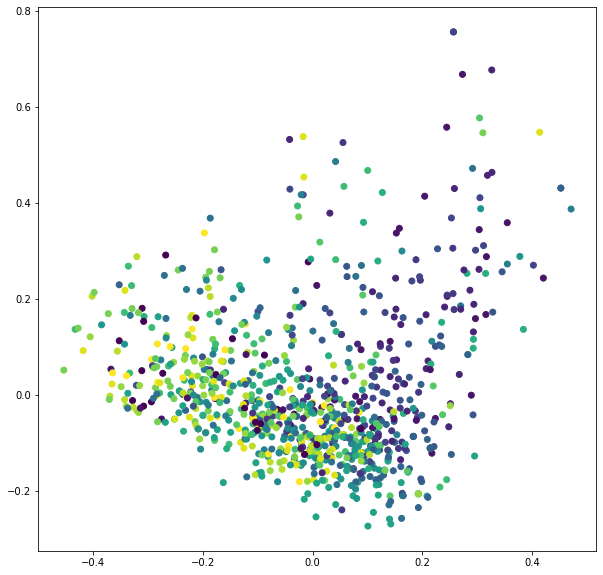

In [39]:
import matplotlib.cm as cm
import numpy as np

PCA_TFIDF = pca.transform(TFIDF.toarray())
print(PCA_TFIDF.shape)

plt.figure(figsize=(10,10))
plt.scatter(PCA_TFIDF[:,0], PCA_TFIDF[:,1], c=data_target)
plt.show()